# Sobre os Conjuntos de Dados
- O conjunto de dados, é referente aos dados pessoais de custo médico. Os dados contém o sexo do contratante homem ou mulher, idade, dependentes, BMI, se os pacientes são fumantes ou não, a região e os custos médicos. Farei uma EDA, e depois farei os modelos para a previsão de seguro.

# Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Carregando os Dados

In [2]:
df = pd.read_csv('/content/insurance.csv')

## Informações dos Dados

In [3]:
# visualizando as primeiras cinco linhas
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# criando uma tabela com as informações dos dados
print('Tamanho dos Dados:',df.shape)
print('Dados Duplicados:',df.duplicated().sum())
tabela = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isna().sum(),
    'Types':df.dtypes.values
})
tabela

Tamanho dos Dados: (1338, 7)
Dados Duplicados: 1


,Unique,Null,Types
age,47,0,int64
sex,2,0,object
bmi,548,0,float64
children,6,0,int64
smoker,2,0,object
region,4,0,object
charges,1337,0,float64


In [5]:
df.corr()['charges'].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

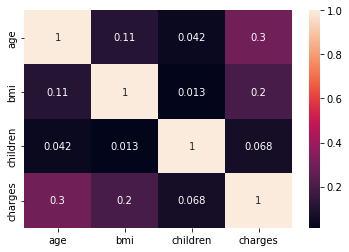

In [6]:
sns.heatmap(df.corr(), annot=True)

# Gráficos

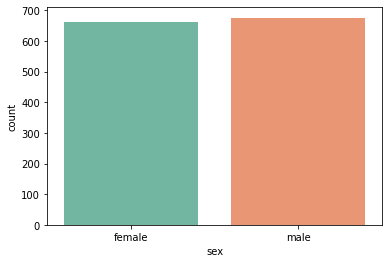

In [7]:
# gênero
sns.countplot(x=df['sex'], palette='Set2')

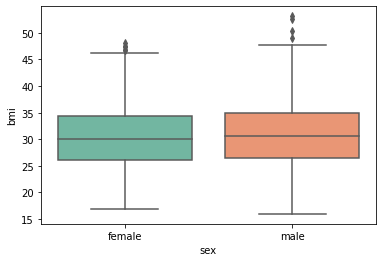

In [8]:
# BMI POR GÊNERO
sns.boxplot(x=df['sex'], y=df['bmi'], palette='Set2')

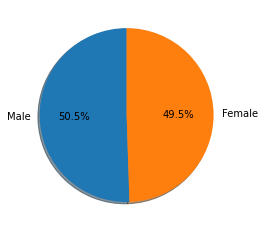

In [9]:
valor = df['sex'].value_counts()
nomes = ['Male','Female']
explode = (0,0)
plt.pie(valor, labels=nomes, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

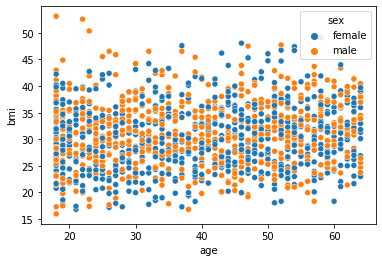

In [10]:
# IBM é a causa da idade por gênero
sns.scatterplot(x=df['age'], y=df['bmi'], hue=df['sex'])

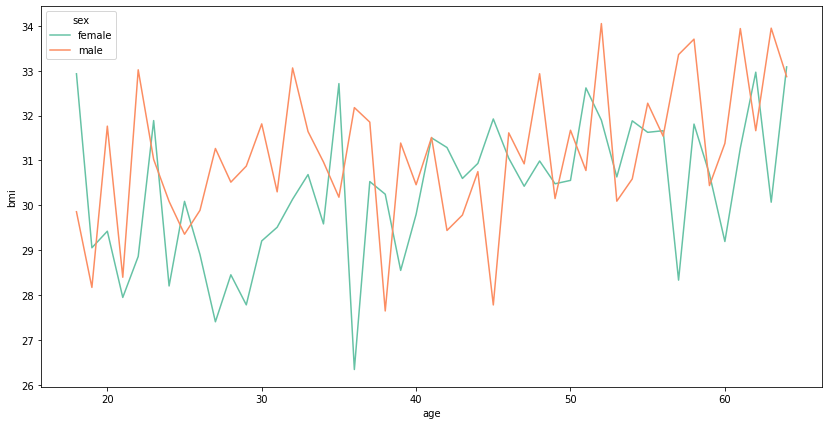

In [11]:
plt.figure(figsize=(14,7))
sns.lineplot(x=df['age'], y=df['bmi'], hue=df['sex'], ci=None, palette='Set2')

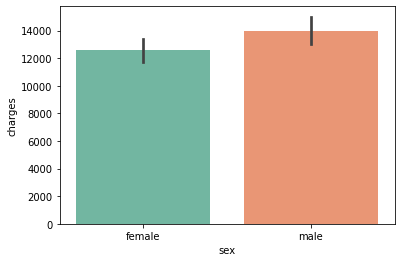

In [12]:
# mulheres são propensas a ter seguro mais alto do que os homens
sns.barplot(x=df['sex'], y=df['charges'],palette='Set2')

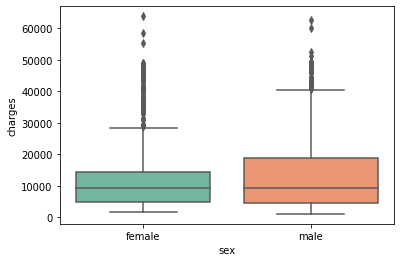

In [13]:
sns.boxplot(x=df['sex'], y=df['charges'], palette='Set2')

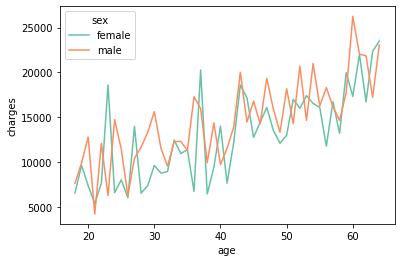

In [14]:
## pessoas com mais idade são propensas a ter seguro alto
sns.lineplot(x=df['age'], y=df['charges'], hue=df['sex'], ci=None, palette='Set2')

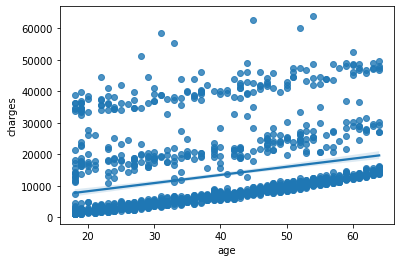

In [15]:
sns.regplot(x=df['age'], y=df['charges'])

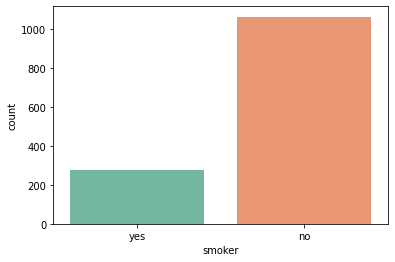

In [16]:
# homens fumam mais que as mulheres?
sns.countplot(x=df['smoker'],palette='Set2')

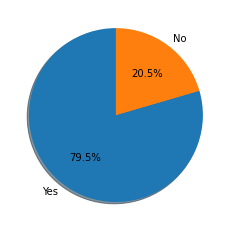

In [17]:
valor = df['smoker'].value_counts()
nome = ['Yes','No']
explode=(0,0)
plt.pie(valor, labels=nome, explode=explode,autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

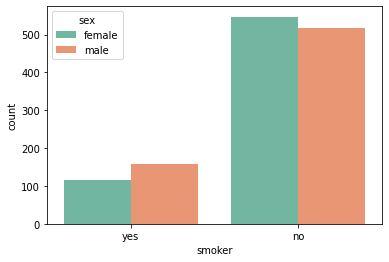

In [18]:
sns.countplot(x=df['smoker'], hue=df['sex'],palette='Set2')

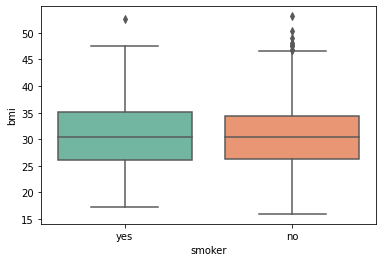

In [19]:
# pessoas que fumam tem bmi alto
sns.boxplot(x=df['smoker'], y=df['bmi'], palette='Set2')

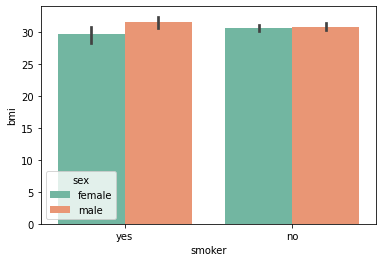

In [20]:
sns.barplot(x=df['smoker'], y =df['bmi'], hue=df['sex'], palette='Set2')

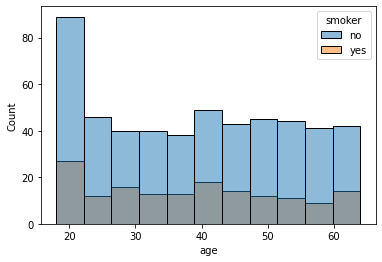

In [21]:
## homens que fumam são maiores de 40 anos
sns.histplot(x='age', hue='smoker',data = df[df['sex'] == 'male'])

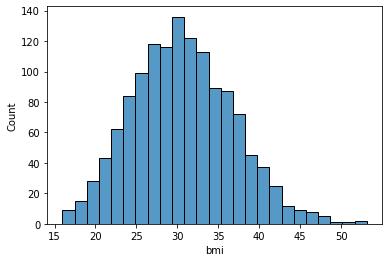

In [22]:
sns.histplot(x=df['bmi'])

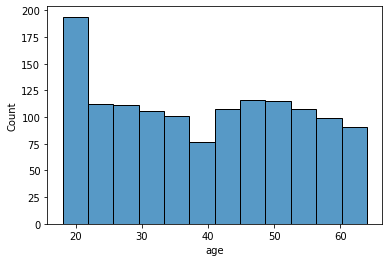

In [23]:
sns.histplot(df['age'])

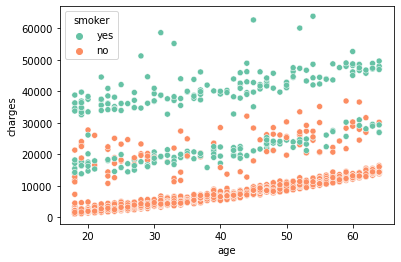

In [24]:
sns.scatterplot(x=df['age'], y=df['charges'], hue=df['smoker'], palette='Set2')

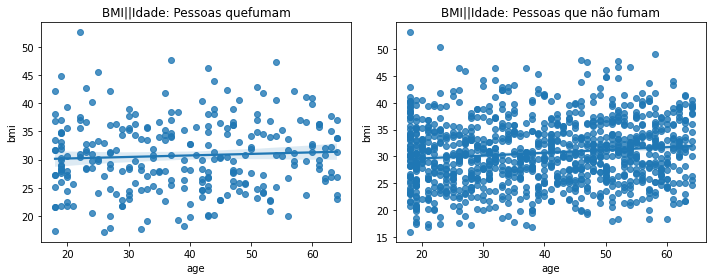

In [25]:
# a idade das pessoas que fumam tem bmi alto
fig, axes = plt.subplots(1,2,figsize=(10,4))
sns.regplot(x='age', y='bmi', data = df[df['smoker'] == 'yes'], ax=axes[0])
axes[0].set_title('BMI||Idade: Pessoas quefumam')

sns.regplot(x='age', y='bmi', data = df[df['smoker'] == 'no'], ax=axes[1])
axes[1].set_title('BMI||Idade: Pessoas que não fumam')

plt.tight_layout()
plt.show()

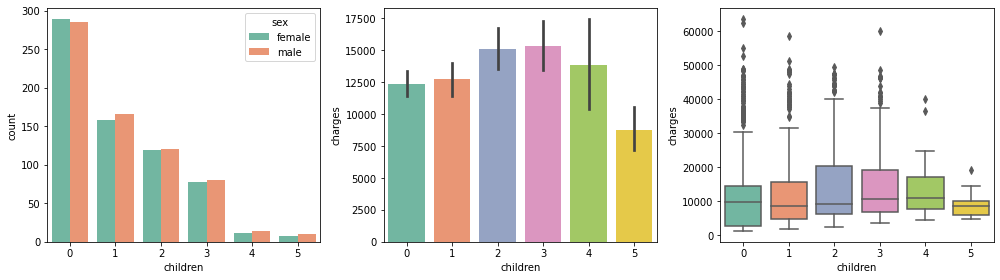

In [26]:
fig, axes = plt.subplots(1,3,figsize=(14,4))
sns.countplot(x=df['children'], hue=df['sex'], ax=axes[0],palette='Set2')
sns.barplot(x=df['children'], y=df['charges'],ax=axes[1], palette='Set2')
sns.boxplot(x=df['children'], y=df['charges'], ax=axes[2], palette='Set2')
plt.tight_layout()
plt.show()

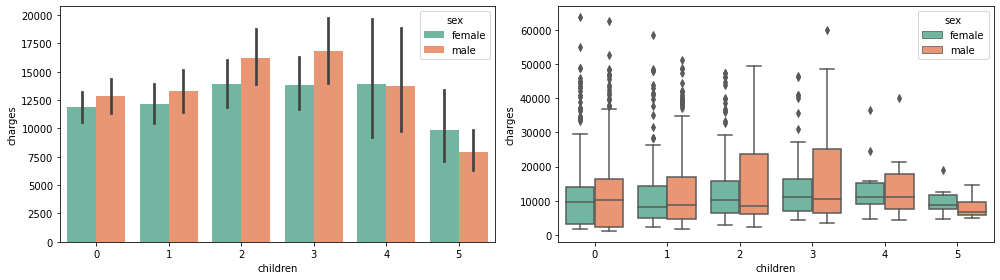

In [27]:
fig, axes = plt.subplots(1,2,figsize=(14,4))
sns.barplot(x=df['children'], y=df['charges'],hue=df['sex'],ax=axes[0],palette='Set2')
sns.boxplot(x=df['children'], y=df['charges'], hue=df['sex'], ax=axes[1],palette='Set2')
plt.tight_layout()
plt.show()

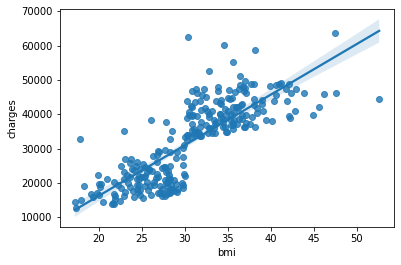

In [28]:
# seguro são mais propensos as pessoas que fumam e tem bmi alto?
sns.regplot(x='bmi', y='charges', data = df[df['smoker'] == 'yes'])

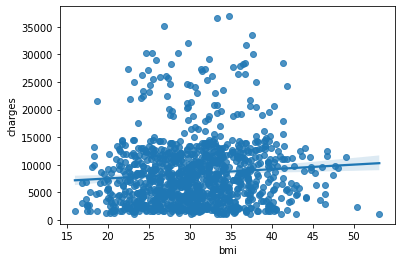

In [29]:
# Pessoas que não fumam também tem o seguro alto?
sns.regplot(x='bmi', y='charges', data = df[df['smoker'] == 'no'])

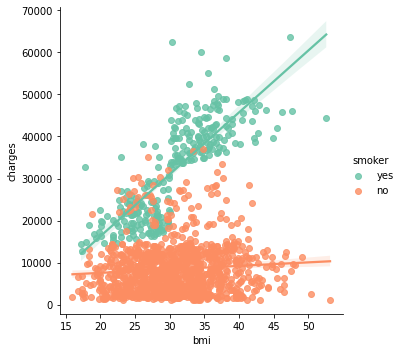

In [30]:
sns.lmplot(x='bmi', y='charges', hue='smoker', data=df, palette='Set2')
plt.show()

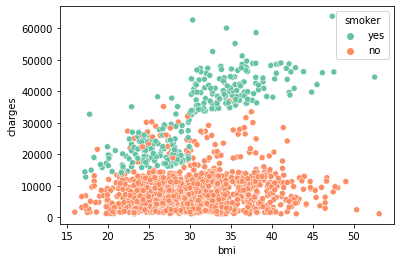

In [31]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, palette='Set2')

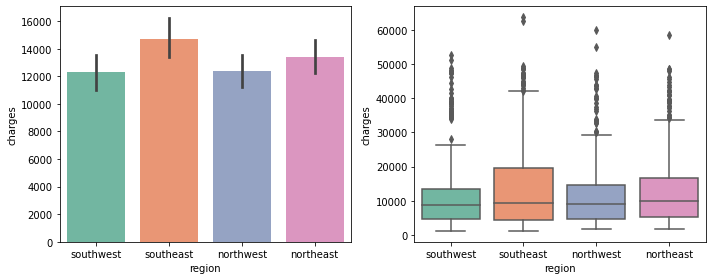

In [32]:
# qual região com mais seguro
fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.barplot(x=df['region'], y=df['charges'], ax=axes[0], palette='Set2')
sns.boxplot(x=df['region'], y=df['charges'], ax=axes[1], palette='Set2')
plt.tight_layout()
plt.show()

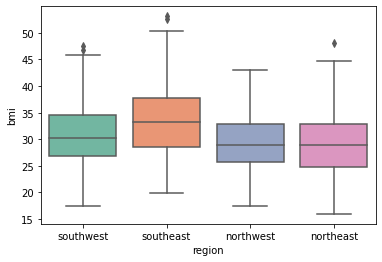

In [33]:
# qual a região com mais indice de bmi
sns.boxplot(x=df['region'],y=df['bmi'],palette='Set2')

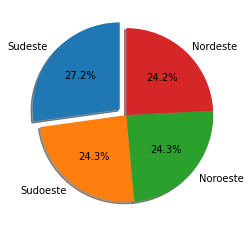

In [34]:
valor = df['region'].value_counts()
nome = ['Sudeste','Sudoeste','Noroeste','Nordeste']
explode = (0.1,0,0,0)
plt.pie(valor, labels=nome, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

In [35]:
# qual a região com mais indice de fumo

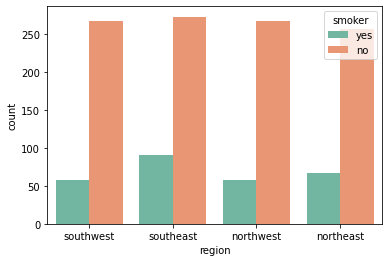

In [36]:
sns.countplot(x=df['region'], hue=df['smoker'], palette='Set2')


## Transformando os Dados

In [37]:
df.drop_duplicates(inplace=True)

In [38]:
df =df.replace({'yes':1, 'no':0,'female':1,'male':0})

In [39]:
cat = df.select_dtypes(include='O')

df = pd.get_dummies(df, columns=[col for col in df.columns if col in cat])

df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


# Preparando os dados

In [40]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import recall_score, f1_score, precision_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [41]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


## Selecionando os dados para treinamento

In [49]:
y = df.charges
x = df.drop('charges',axis=1)

In [50]:
xtrain, xtest, ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [51]:
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

## Avaliação dos Modelos

In [45]:
def models_regressor(xtrain, xtest, ytrain, ytest):
  regression = {
      'LINEAR':LinearRegression(),
      'LASSO':Lasso(),
      'RIDGE':Ridge(),
      'ELASTICNET':ElasticNet(alpha=0.1),
      'KNN-R':KNeighborsRegressor(n_neighbors=5),
      'DECISION TREE':DecisionTreeRegressor(max_depth=5),
      'RANDOM FOREST':RandomForestRegressor(max_depth=5),
      'ADA':AdaBoostRegressor(),
      'EXTRA':ExtraTreesRegressor(max_depth=5),
      'GRADIENT':GradientBoostingRegressor(max_depth=5)
  }

  for nome, model in regression.items():

    print('->'*5,nome,'<-'*5)

    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)

    print('Score Train:', model.score(xtrain, ytrain))
    print('Score Test:', model.score(xtest, ytest))
    print()
    print('MAE:', mean_absolute_error(ytest, y_pred))
    print('MSE:', mean_squared_error(ytest, y_pred))
    print('RMSE:', mean_squared_error(ytest, y_pred, squared=False))
    print('MAPE:', mean_absolute_percentage_error(ytest, y_pred))
    print('->'*20)
    print()

In [46]:
models_regressor(xtrain, xtest, ytrain,ytest)

->->->->-> LINEAR <-<-<-<-<-
Score Train: 0.7295500613448311
Score Test: 0.8091623865927691

MAE: 4383.709199958956
MSE: 35067568.71070969
RMSE: 5921.787627964185
MAPE: 0.4832666756900314
->->->->->->->->->->->->->->->->->->->->

->->->->-> LASSO <-<-<-<-<-
Score Train: 0.7299050439245498
Score Test: 0.809014006356454

MAE: 4399.607364825989
MSE: 35094834.47891643
RMSE: 5924.089337519855
MAPE: 0.4932094473206756
->->->->->->->->->->->->->->->->->->->->

->->->->-> RIDGE <-<-<-<-<-
Score Train: 0.7298415006597601
Score Test: 0.8078029534420362

MAE: 4400.149215506676
MSE: 35317372.795815356
RMSE: 5942.8421479806575
MAPE: 0.4905508632111758
->->->->->->->->->->->->->->->->->->->->

->->->->-> ELASTICNET <-<-<-<-<-
Score Train: 0.6711733673211455
Score Test: 0.7053587223314802

MAE: 5245.184200482188
MSE: 54142121.48840786
RMSE: 7358.133016493237
MAPE: 0.6861238724286973
->->->->->->->->->->->->->->->->->->->->

->->->->-> KNN-R <-<-<-<-<-
Score Train: 0.8282013870017062
Score Test: 0.821

In [47]:
# Criando uma tabela para a comparação dos resultados das avaliações do modelos
def table_models(xtrain, xtest, ytrain, ytest):
  regression = {
       'LINEAR':LinearRegression(),
      'LASSO':Lasso(),
      'RIDGE':Ridge(),
      'ELASTICNET':ElasticNet(alpha=0.1),
      'KNN-R':KNeighborsRegressor(n_neighbors=5),
      'DECISION TREE':DecisionTreeRegressor(max_depth=5),
      'RANDOM FOREST':RandomForestRegressor(max_depth=5),
      'ADA':AdaBoostRegressor(),
      'EXTRA':ExtraTreesRegressor(max_depth=5),
      'GRADIENT':GradientBoostingRegressor(max_depth=5)
  }

  modelos = []
  for nome, model in regression.items():

    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)

    modelo = nome, model.score(xtest, ytest)
    modelos.append(modelo)
    tabela = pd.DataFrame(modelos, columns=['Models','Score'])
  return tabela

In [52]:
# imprimindo tabela e identificar qual a melhor avaliação do modelo
tabela = table_models(xtrain, xtest, ytrain, ytest)
tabela.sort_values('Score', ascending=False)

,Models,Score
8,EXTRA,0.889282
6,RANDOM FOREST,0.884313
5,DECISION TREE,0.876907
9,GRADIENT,0.864427
7,ADA,0.853306
4,KNN-R,0.821446
0,LINEAR,0.809162
1,LASSO,0.809014
2,RIDGE,0.807803
3,ELASTICNET,0.705359
